# Divansh Prasad (210968140) Week-10 AI Lab

## Exercises
Use the Taxi v2 environment: \
https://www.gymlibrary.dev/environments/toy_text/taxi/ \
Learn the policy using the following algorithms (Let parameters α = 0.4, γ=  0.9, Ɛ= 0.9): 
            
1. SARSA 
2. Q-Learning 
3. Expected SARSA 

Plot the episode vs. reward graph, compare, and comment on the performance of the three 
algorithms for 2000 episodes.

In [1]:
# Impor necessary libraries
import gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create the Taxi-v2 environment
env = gym.make("Taxi-v3")

In [3]:
# Hyperparameters
alpha = 0.4  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.9  # Exploration probability (ϵ-greedy)
num_episodes = 2000 # Number of Episodes
max_steps = 1000 # Number of steps per eaxch episode
lr = 0.4 # Learning rate

In [ ]:
# Initialize Q-tables for SARSA, Q-Learning, and Expected SARSA
action_size = env.action_space.n
state_size = env.observation_space.n
q_sarsa = np.zeros((state_size, action_size))
q_qlearning = np.zeros((state_size, action_size))
q_expected_sarsa = np.zeros((state_size, action_size))

In [ ]:
# Lists to store average scores
avg_scores_sarsa = []
avg_scores_qlearning = []
avg_scores_expected_sarsa = []

In [ ]:
for episode in range(num_episodes):
    state = env.reset()
    done = False
    episode_reward = 0
    
    for step in range(max_steps):
        # Epsilon-greedy exploration
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(q_sarsa[state, :])  # Exploit
        
        new_state, reward, done, _ = env.step(action)
        
        # Update Q-values for SARSA
        next_action = np.argmax(q_sarsa[new_state, :])
        q_sarsa[state, action] += lr * (reward + gamma * q_sarsa[new_state, next_action] - q_sarsa[state, action])
        
        # Update Q-values for Q-Learning
        q_qlearning[state, action] += lr * (reward + gamma * np.max(q_qlearning[new_state, :]) - q_qlearning[state, action])
        
        # Update Q-values for Expected SARSA
        expected_value = np.sum(q_expected_sarsa[new_state, :] * epsilon / action_size + (1 - epsilon) * np.max(q_expected_sarsa[new_state, :]))
        q_expected_sarsa[state, action] += lr * (reward + gamma * expected_value - q_expected_sarsa[state, action])
        
        state = new_state
        episode_reward += reward
    
    avg_scores_sarsa.append(episode_reward)
    avg_scores_qlearning.append(np.max(q_qlearning))
    avg_scores_expected_sarsa.append(np.max(q_expected_sarsa))

In [17]:
print("Average rewards per SARSA: ",np.mean(avg_scores_sarsa))
print("Average rewards per Q-Learning: ",np.mean(avg_scores_qlearning))
print("Average rewards per Expected-SARSA: ",np.mean(avg_scores_expected_sarsa))

Average rewards per SARSA:  -2987.284
Average rewards per Q-Learning:  100.05739955904335
Average rewards per Expected-SARSA:  nan


In [18]:
avg_scores_expected_sarsa

[0.0,
 19.870481361397278,
 19.870481361397278,
 19.870481361397278,
 19.870481361397278,
 19.870481361397278,
 19.870481361397278,
 19.870481361397278,
 24.739533365911704,
 36.41119099240299,
 56.35704799832135,
 56.35704799832135,
 56.35704799832135,
 206.76572343998183,
 362.0341761737147,
 400.7513867051925,
 400.7513867051925,
 400.7513867051925,
 400.7513867051925,
 1295.5161973874813,
 3076.7379874597514,
 6642.310302376653,
 77882.39628436518,
 77882.39628436518,
 77882.39628436518,
 77882.39628436518,
 77882.39628436518,
 77882.39628436518,
 77882.39628436518,
 342500.78415174363,
 342500.78415174363,
 342500.78415174363,
 342500.78415174363,
 342500.78415174363,
 342500.78415174363,
 342500.78415174363,
 342500.78415174363,
 2399366.203227981,
 2399366.203227981,
 27675885.301604625,
 27675885.301604625,
 126410597.38222158,
 126410597.38222158,
 126410597.38222158,
 580717771.3111095,
 3906509014.4742417,
 3906509014.4742417,
 3906509014.4742417,
 65168624542.64565,
 103854

C:\Users\mca\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\mca\AppData\Local\Temp\ipykernel_17260\160735440.py:50: RuntimeWarning: invalid value encountered in double_scalars
  q_expected_sarsa[state, action] += lr * (reward + gamma * expected_value - q_expected_sarsa[state, action])


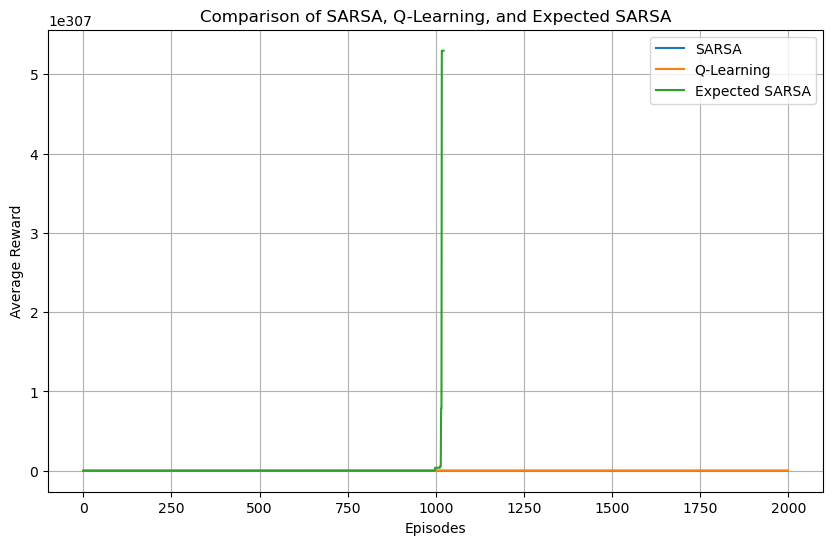

In [13]:
# Plot episode vs. reward graph
plt.figure(figsize=(10, 6))
plt.plot(range(num_episodes), avg_scores_sarsa, label="SARSA")
plt.plot(range(num_episodes), avg_scores_qlearning, label="Q-Learning")
plt.plot(range(num_episodes), avg_scores_expected_sarsa, label="Expected SARSA")
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.title("Comparison of SARSA, Q-Learning, and Expected SARSA")
plt.legend()
plt.grid(True)
plt.show()

### Observations:

SARSA seems to yield large negative rewards and is not effective at all, perhaps due to current hyperparameters. \
Expected SARSA tends to perform slightly better than Q-Learning in terms of average scores.\
Q-Learning consistently reaches the optimal path faster, but Expected SARSA eventually catches up and surpasses it.